In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

- 0: hardcore
- 1: lg
- 2: poisson

Each montecarlo: small disturbance
which is better, all samples or just the median.


2 types of files:
- ending in .nc
- ending in _median.nc

In [2]:
jfunc_hardcore_data = xr.load_dataset("./data/Process=hardcore_INTENS=uniform_pertub=uniform.nc")
jfunc_hardcore_data = jfunc_hardcore_data.rename({"hardcore": "v"})
jfunc_hardcore_data = jfunc_hardcore_data.expand_dims({"class": [0]})

jfunc_lg_data = xr.load_dataset("./data/Process=lg_INTENS=uniform_pertub=uniform.nc")
jfunc_lg_data = jfunc_lg_data.rename({"lg": "v"})
jfunc_lg_data = jfunc_lg_data.expand_dims({"class": [1]})

jfunc_poisson_data = xr.load_dataset("./data/Process=poisson_INTENS=uniform_pertub=uniform.nc")
jfunc_poisson_data = jfunc_poisson_data.rename({"poisson": "v"})
jfunc_poisson_data = jfunc_poisson_data.expand_dims({"class": [2]})

jfunc_all_data = xr.concat([jfunc_hardcore_data, jfunc_lg_data, jfunc_poisson_data], dim='class')
display(jfunc_all_data)

<xarray.Dataset>
Dimensions:                 (Radius: 180, Ens. Number: 100,
                             Monte Carlo Simulation: 9895, class: 3)
Coordinates:
  * Radius                  (Radius) float64 0.0 0.01676 0.03352 ... 2.983 3.0
  * Ens. Number             (Ens. Number) float64 1.0 2.0 3.0 ... 99.0 100.0
  * Monte Carlo Simulation  (Monte Carlo Simulation) float64 1.0 ... 9.895e+03
  * class                   (class) int64 0 1 2
Data variables:
    v                       (class, Monte Carlo Simulation, Ens. Number, Radius) float32 ...
Attributes:
    contact:  Niklas.luther@zeu.uni-giessen.de

In [3]:
jfunc_all_data.to_netcdf("data/jfunction_data_ensemble.nc")

In [4]:
jfunc_hardcore_med_data = xr.load_dataset("./data/Process=hardcore_INTENS=uniform_pertub=uniform_median.nc")
jfunc_hardcore_med_data = jfunc_hardcore_med_data.rename({"hardcore": "v", "x": "Radius"}).drop("y")
jfunc_hardcore_med_data = jfunc_hardcore_med_data.expand_dims({"class": [0]})

jfunc_lg_med_data = xr.load_dataset("./data/Process=lg_INTENS=uniform_pertub=uniform_median.nc")
jfunc_lg_med_data = jfunc_lg_med_data.rename({"lg": "v", "x": "Radius"}).drop("y")
jfunc_lg_med_data = jfunc_lg_med_data.expand_dims({"class": [1]})

jfunc_poisson_med_data = xr.load_dataset("./data/Process=poisson_INTENS=uniform_pertub=uniform_median.nc")
jfunc_poisson_med_data = jfunc_poisson_med_data.rename({"poisson": "v", "x": "Radius"}).drop("y")
jfunc_poisson_med_data = jfunc_poisson_med_data.expand_dims({"class": [2]})

jfunc_all_med_data = xr.concat([jfunc_hardcore_med_data, jfunc_lg_med_data, jfunc_poisson_med_data], dim='class')
display(jfunc_all_med_data)

<xarray.Dataset>
Dimensions:                 (Radius: 180, Monte Carlo Simulation: 9895,
                             class: 3, y: 1)
Coordinates:
  * Radius                  (Radius) float64 0.0 0.01676 0.03352 ... 2.983 3.0
  * Monte Carlo Simulation  (Monte Carlo Simulation) float64 1.0 ... 9.895e+03
  * class                   (class) int64 0 1 2
Dimensions without coordinates: y
Data variables:
    v                       (class, Monte Carlo Simulation, y, Radius) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.3 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    contact:      Niklas.luther@zeu.uni-giessen.de
    history:      Wed Sep 18 15:48:58 2024: cdo mermean Process=hardcore_INTE...
    CDO:          Climate Data Operators version 2.0.3 (https://mpimet.mpg.de...

In [5]:
jfunc_all_med_data.to_netcdf("data/jfunction_data_med.nc")

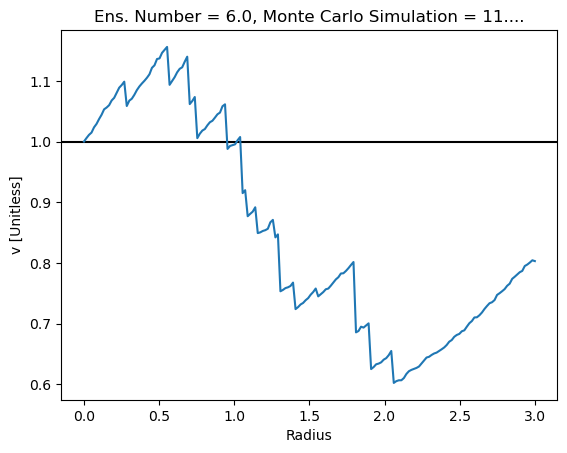

In [48]:
# jfunc_data.isel(**{"Monte Carlo Simulation": 100, "Ens. Number": 0})["v"].plot.line()
# jfunc_data.isel(**{"Monte Carlo Simulation": 100, "Ens. Number": 0})["v"].plot.line()
# jfunc_all_data.isel(**{"Monte Carlo Simulation": 10, "Ens. Number": 0})["v"].squeeze().plot.line()

jfunc_all_data.isel(**{"Monte Carlo Simulation": 10, "Ens. Number": 5, "class": 2})["v"].plot.line()
plt.axhline(1, color='black', zorder=-100)
plt.show()


